In [1]:
api_key = 'W4KB22GXZC6HLLMP'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances

# Time Series

In [8]:
stock = 'TSLA'

In [9]:
ts = TimeSeries(key=api_key, output_format='pandas')
ts_data, meta_data = ts.get_daily(stock, outputsize='compact')
# data, meta_data = ts.get_batch_stock_quotes(symbols=('MSFT', 'FB', 'AAPL', 'GOOGL', 'TSLA'))

In [5]:
ts_data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2018-05-11,307.70,308.8800,299.08,301.06,4679649.0
2018-05-14,303.32,304.9400,291.62,291.97,7286804.0
2018-05-15,285.01,286.9600,280.50,284.18,9519173.0
2018-05-16,283.83,288.8100,281.56,286.48,5668850.0
2018-05-17,285.90,289.1873,283.97,284.54,4418041.0


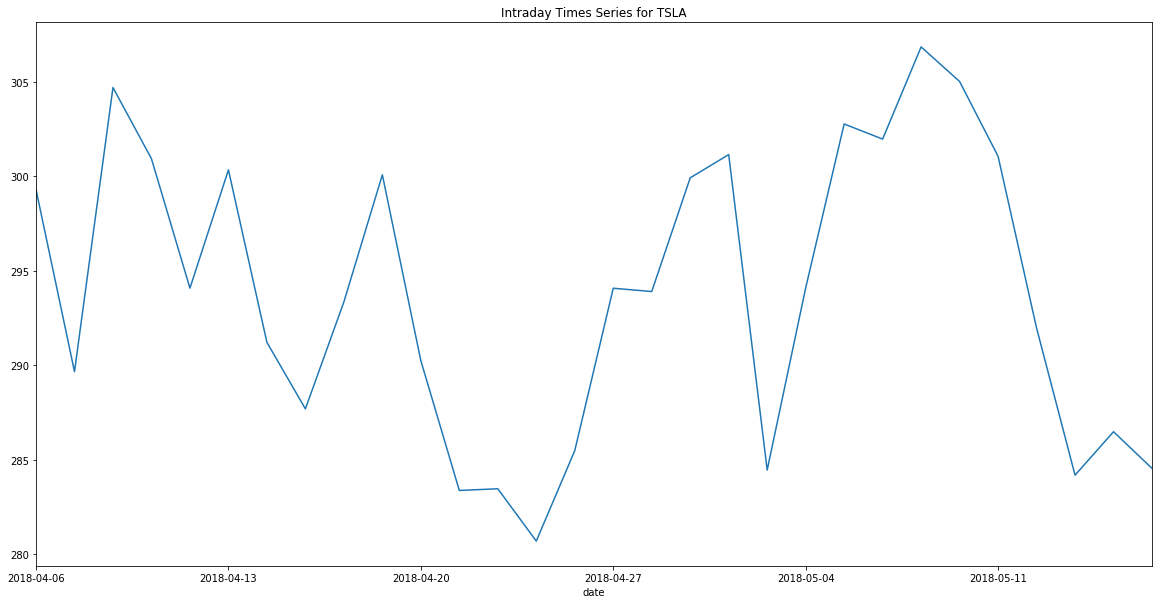

In [10]:
plt.plot(ts_data.tail(30)['4. close'])
plt.title(f'Intraday Times Series for {stock}')
plt.show()

# Technical Indicators

In [11]:
ti = TechIndicators(key=api_key, output_format='pandas')

In [ ]:
# ti_data, meta = ti.get_bbands(symbol='TSLA', interval='60min', time_period=60)
ti_50_data, meta = ti.get_sma(stock, time_period=50)
ti_200_data, meta = ti.get_sma(stock, time_period=200)

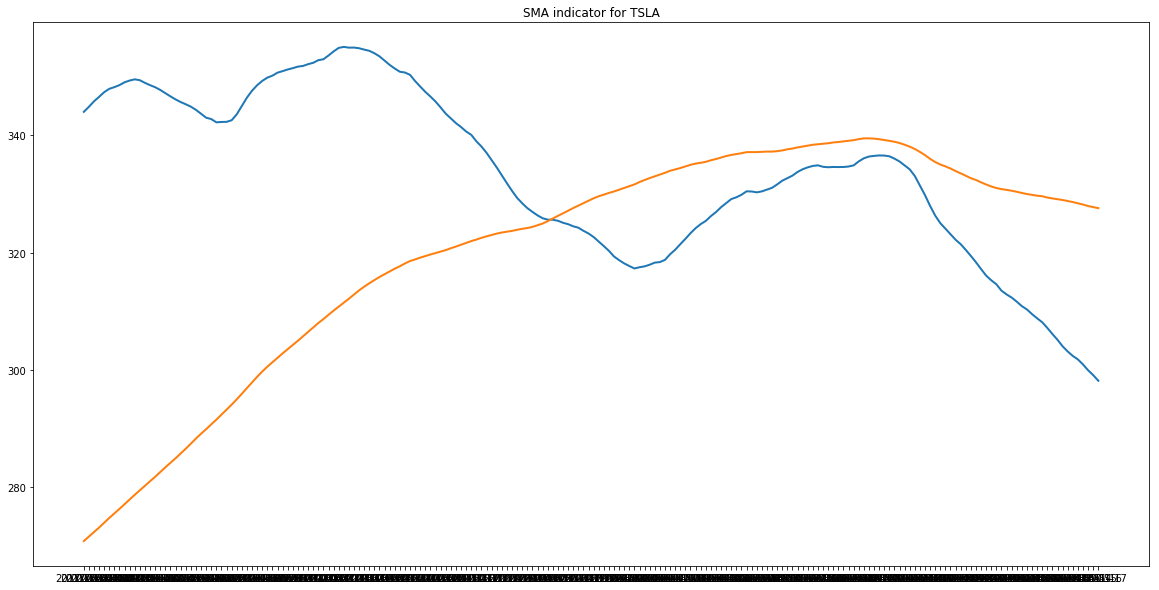

In [53]:
plt.plot(ti_50_data.tail(200), lw=2, label='50ma')
plt.plot(ti_200_data.tail(200), lw=2, label='200ma')
plt.title(f'SMA indicator for {stock}')
plt.show()

# Sector Performance

In [21]:
sp = SectorPerformances(key=api_key, output_format='pandas')
sp_data, meta_data = sp.get_sector()
sp_data.head()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Consumer Discretionary,-0.0061,0.0016,0.0064,0.0377,0.0228,0.0647,0.1691,0.3935,0.8593,2.2173
Consumer Staples,-0.0043,-0.0002,0.0017,-0.0632,-0.0960,-0.1364,-0.1007,0.0120,0.1934,0.7503
Energy,0.0001,0.0063,0.0422,0.0779,0.1448,0.0664,0.1438,-0.0298,-0.0376,-0.1058
Financials,-0.0016,-0.0006,0.0284,0.0273,0.0014,0.0088,0.1986,0.4150,0.8010,0.3432
Health Care,-0.0129,0.0065,0.0325,0.0206,0.0080,0.0106,0.1119,0.1453,0.7193,1.6472


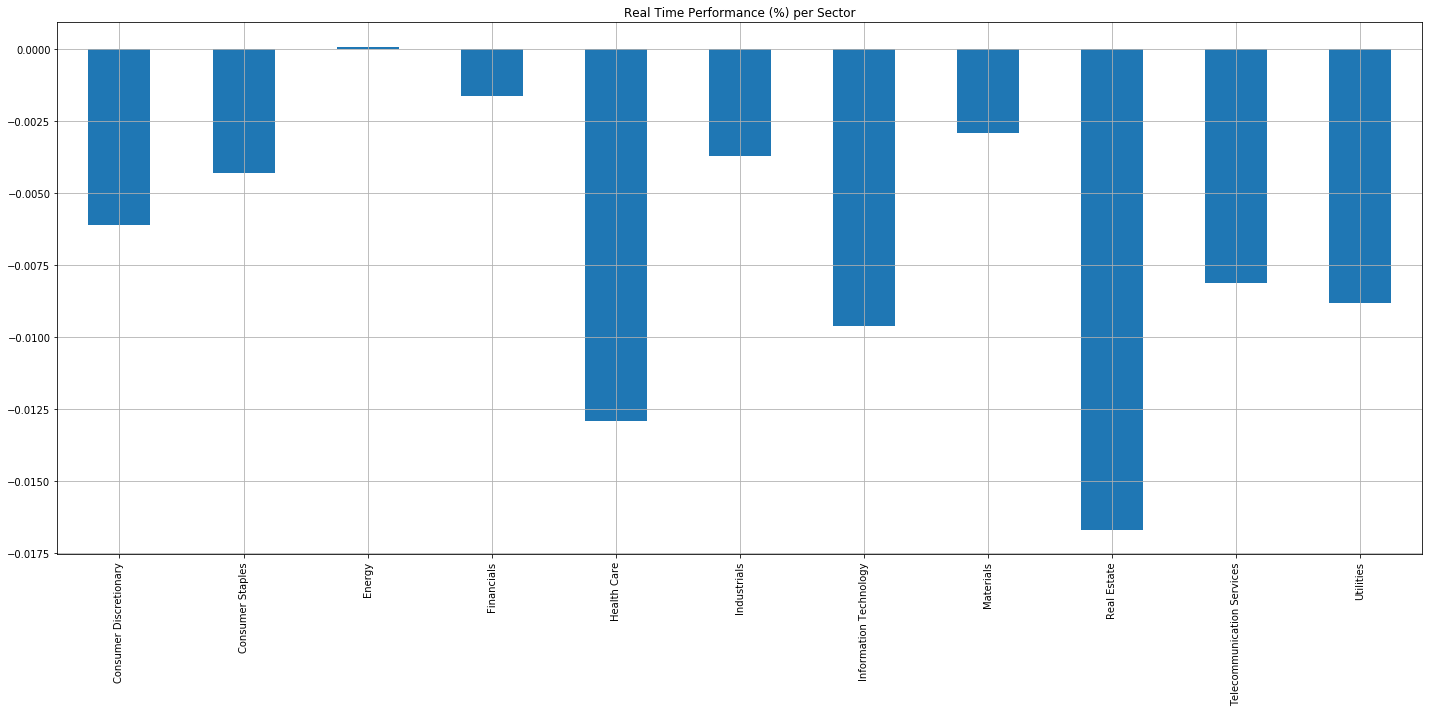

In [20]:
sp_data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()